<a href="https://colab.research.google.com/github/zypaoo/NCKH-DuyBao/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT LIBRARY**

In [3]:
!pip install imbalanced-learn
!pip install category_encoders
pip install pytorch-tabnet
pip install tabtransformertf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer
from tabtransformertf.utils.preprocessing import build_categorical_prep
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# **LOAD DATA**

In [4]:
churn_data = pd.read_csv("/content/drive/MyDrive/Dataset_NCKH/Bảo Link2.csv")

In [5]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [82]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
dataset = churn_data.copy()

# ***PREPROCESSING***

In [9]:
columns_to_drop = ['customerID']
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

In [12]:
dataset.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', '0.0').astype(float)

In [15]:
def print_unique_col_values(dataset):
       for column in dataset:
            if dataset[column].dtypes=='object':
                print(f'{column}: {dataset[column].unique()}')

In [16]:
print_unique_col_values(dataset)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
dataset.replace('No internet service', 'No', inplace = True)
dataset.replace('No phone service', 'No', inplace = True)

In [18]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [19]:
multi_cat_cols = [
    'InternetService',
    'Contract',
    'PaymentMethod'
]

In [20]:
binary_map = {
    'Yes': 1, 'No': 0,
    'Female': 1, 'Male': 0}
for col in binary_cols:
    dataset[col] = dataset[col].map(binary_map)

In [22]:
print_unique_col_values(dataset)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
dataset_ft= dataset.copy()

In [24]:
dataset_hash = pd.get_dummies(dataset,columns=['InternetService','Contract','PaymentMethod'], dtype=int)

In [25]:
dataset_hash

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
corr = dataset_hash.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.00,0.00,0.00,-0.01,-0.01,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01,-0.01,0.01,-0.01,0.00,-0.01,0.00,0.02,-0.00,-0.00,-0.01
SeniorCitizen,0.00,1.00,0.02,-0.21,0.02,0.01,0.14,-0.04,0.07,0.06,-0.06,0.11,0.12,0.16,0.22,0.10,0.15,-0.11,0.26,-0.18,0.14,-0.05,-0.12,-0.02,-0.02,0.17,-0.15
Partner,0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.14,0.14,0.15,0.12,0.12,0.12,-0.01,0.10,0.32,-0.15,-0.00,0.00,0.00,-0.28,0.08,0.25,0.11,0.08,-0.08,-0.10
Dependents,-0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.08,0.02,0.01,0.06,-0.02,-0.04,-0.11,-0.11,0.06,-0.16,0.05,-0.17,0.14,-0.23,0.07,0.20,0.05,0.06,-0.15,0.06
tenure,-0.01,0.02,0.38,0.16,1.00,0.01,0.33,0.33,0.36,0.36,0.32,0.28,0.29,0.01,0.25,0.83,-0.35,0.01,0.02,-0.04,-0.65,0.20,0.56,0.24,0.23,-0.21,-0.23
PhoneService,0.01,0.01,0.02,-0.00,0.01,1.00,0.28,-0.09,-0.05,-0.07,-0.10,-0.02,-0.03,0.02,0.25,0.11,0.01,-0.45,0.29,0.17,-0.00,-0.00,0.00,0.01,-0.01,0.00,-0.00
MultipleLines,0.01,0.14,0.14,-0.02,0.33,0.28,1.00,0.10,0.20,0.20,0.10,0.26,0.26,0.16,0.49,0.47,0.04,-0.20,0.37,-0.21,-0.09,-0.00,0.11,0.08,0.06,0.08,-0.23
OnlineSecurity,0.02,-0.04,0.14,0.08,0.33,-0.09,0.10,1.00,0.28,0.28,0.35,0.18,0.19,-0.00,0.30,0.41,-0.17,0.32,-0.03,-0.33,-0.25,0.10,0.19,0.10,0.12,-0.11,-0.08
OnlineBackup,0.01,0.07,0.14,0.02,0.36,-0.05,0.20,0.28,1.00,0.30,0.29,0.28,0.27,0.13,0.44,0.51,-0.08,0.16,0.17,-0.38,-0.16,0.08,0.11,0.09,0.09,-0.00,-0.17
DeviceProtection,0.00,0.06,0.15,0.01,0.36,-0.07,0.20,0.28,0.30,1.00,0.33,0.39,0.40,0.10,0.48,0.52,-0.07,0.15,0.18,-0.38,-0.23,0.10,0.17,0.08,0.11,-0.00,-0.19


In [27]:
corr_with_churn = corr['Churn'].apply(abs).sort_values(ascending=False)
print(corr_with_churn)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
tenure                                     0.352229
InternetService_Fiber optic                0.308020
Contract_Two year                          0.302253
PaymentMethod_Electronic check             0.301919
InternetService_No                         0.227890
TotalCharges                               0.198324
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                          0.177820
OnlineSecurity                             0.171226
TechSupport                                0.164674
Dependents                                 0.164221
SeniorCitizen                              0.150889
Partner                                    0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL                        0.124214
PaymentMethod_Bank transfer (automatic)    0.117937
PaymentMetho

In [ ]:
low_corr_features = corr_with_churn[corr_with_churn < 0.05].index.tolist()
dataset_hash = dataset_hash.drop(columns=low_corr_features)
print(low_corr_features)

In [29]:
dataset_hash

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [30]:
dataset_up1 = dataset_hash.copy()

In [31]:
dataset_up1

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [32]:
for col in dataset_up1.columns:
    unique_vals = dataset_up1[col].unique()
    if set(unique_vals) <= {0, 1}:
        ratio = dataset_up1[col].mean()
        print(f"{col}: {ratio:.2%} là 1 | {100 - ratio*100:.2f}% là 0")

SeniorCitizen: 16.21% là 1 | 83.79% là 0
Partner: 48.30% là 1 | 51.70% là 0
Dependents: 29.96% là 1 | 70.04% là 0
OnlineSecurity: 28.67% là 1 | 71.33% là 0
OnlineBackup: 34.49% là 1 | 65.51% là 0
DeviceProtection: 34.39% là 1 | 65.61% là 0
TechSupport: 29.02% là 1 | 70.98% là 0
StreamingTV: 38.44% là 1 | 61.56% là 0
StreamingMovies: 38.79% là 1 | 61.21% là 0
PaperlessBilling: 59.22% là 1 | 40.78% là 0
Churn: 26.54% là 1 | 73.46% là 0
InternetService_DSL: 34.37% là 1 | 65.63% là 0
InternetService_Fiber optic: 43.96% là 1 | 56.04% là 0
InternetService_No: 21.67% là 1 | 78.33% là 0
Contract_Month-to-month: 55.02% là 1 | 44.98% là 0
Contract_One year: 20.91% là 1 | 79.09% là 0
Contract_Two year: 24.07% là 1 | 75.93% là 0
PaymentMethod_Bank transfer (automatic): 21.92% là 1 | 78.08% là 0
PaymentMethod_Credit card (automatic): 21.61% là 1 | 78.39% là 0
PaymentMethod_Electronic check: 33.58% là 1 | 66.42% là 0
PaymentMethod_Mailed check: 22.89% là 1 | 77.11% là 0


In [33]:
X = dataset_up1.drop(["Churn"],axis=1)
y = dataset_up1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)


In [37]:
cols_to_scale = [col for col in X_train_resample.columns
                 if X_train_resample[col].dtype in ['int64', 'float64'] and X_train_resample[col].nunique() > 2]

scaler = MinMaxScaler()
scaler.fit(X_train_resample[cols_to_scale])
X_train_resample[cols_to_scale] = scaler.transform(X_train_resample[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [38]:
X_train_resample

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0.291667,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0.750000,0,1,0,0,1,1,...,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0.013889,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,0.055556,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,1,0.000000,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,0,1,1,0.388889,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
8272,0,1,0,0.805556,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
8273,0,1,1,0.916667,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
8274,0,0,0,0.041667,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


# **MODEL TRAINING FOR TABNET, MLP**

In [112]:
X_train_resample = X_train_resample.astype({col: int for col in X_train_resample.select_dtypes('bool').columns})
X_train, X_test, y_train, y_test = train_test_split(X_train_resample, y_train_resample, test_size=0.2, random_state=42)


In [113]:
tabn = TabNetClassifier(
    n_d=32, n_a=32,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-8,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [114]:
X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

tabn.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_name=['valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024
)



# Dự đoán và đánh giá
preds = tabn.predict(X_test.values)
print(classification_report(y_test, preds))

epoch 0  | loss: 1.54403 | valid_accuracy: 0.5006  |  0:00:00s
epoch 1  | loss: 0.79787 | valid_accuracy: 0.68116 |  0:00:01s
epoch 2  | loss: 0.63312 | valid_accuracy: 0.60688 |  0:00:02s
epoch 3  | loss: 0.5526  | valid_accuracy: 0.60205 |  0:00:03s
epoch 4  | loss: 0.53758 | valid_accuracy: 0.60326 |  0:00:04s
epoch 5  | loss: 0.51208 | valid_accuracy: 0.59843 |  0:00:05s
epoch 6  | loss: 0.49288 | valid_accuracy: 0.71075 |  0:00:06s
epoch 7  | loss: 0.50363 | valid_accuracy: 0.73551 |  0:00:07s
epoch 8  | loss: 0.49029 | valid_accuracy: 0.73853 |  0:00:08s
epoch 9  | loss: 0.48559 | valid_accuracy: 0.74577 |  0:00:09s
epoch 10 | loss: 0.47574 | valid_accuracy: 0.75845 |  0:00:10s
epoch 11 | loss: 0.47789 | valid_accuracy: 0.77053 |  0:00:11s
epoch 12 | loss: 0.46358 | valid_accuracy: 0.75725 |  0:00:12s
epoch 13 | loss: 0.46527 | valid_accuracy: 0.77355 |  0:00:13s
epoch 14 | loss: 0.46488 | valid_accuracy: 0.77657 |  0:00:14s
epoch 15 | loss: 0.45537 | valid_accuracy: 0.75121 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       830
           1       0.80      0.80      0.80       826

    accuracy                           0.80      1656
   macro avg       0.80      0.80      0.80      1656
weighted avg       0.80      0.80      0.80      1656



In [127]:
y_proba = tabn.predict_proba(X_test.values)[:, 1]
threshold = 0.5
y_pred1 = (y_proba >= threshold).astype(int)

In [128]:

accuracy_tabn  = accuracy_score(y_test, y_pred1)
precision_tabn = precision_score(y_test, y_pred1)
recall_tabn    = recall_score(y_test, y_pred1)
f1_tabn        = f1_score(y_test, y_pred1)
roc_auc_tabn   = roc_auc_score(y_test, y_pred1)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Score' : [accuracy_tabn, precision_tabn, recall_tabn, f1_tabn, roc_auc_tabn]
})

print(results_df)

      Metric     Score
0   Accuracy  0.802536
1  Precision  0.802424
2     Recall  0.801453
3   F1-Score  0.801938
4    ROC AUC  0.802534


In [85]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True)

mlp = keras.Sequential([
    keras.layers.Dense(23, input_dim=23, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])


mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

mlp.fit(X_train, y_train,validation_data=(X_test.values, y_test.values),epochs=100,callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5127 - loss: 0.7238 - val_accuracy: 0.6926 - val_loss: 0.6804
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5418 - loss: 0.6783 - val_accuracy: 0.7899 - val_loss: 0.6567
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6170 - loss: 0.6448 - val_accuracy: 0.7965 - val_loss: 0.5782
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6721 - loss: 0.6132 - val_accuracy: 0.8025 - val_loss: 0.5141
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6897 - loss: 0.5860 - val_accuracy: 0.8062 - val_loss: 0.4858
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7033 - loss: 0.5611 - val_accuracy: 0.8086 - val_loss: 0.4701
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7245 - loss: 0.5417 - val_accuracy: 0.8098 - val_loss: 0.4528
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7271 - loss: 0.5569 - val_accuracy: 0.8146

In [86]:

preds2 = mlp.predict(X_test)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [91]:
y_pred2 = []
for element in preds2:
    if element > 0.45:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [92]:

accuracy2  = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2    = recall_score(y_test, y_pred2)
f12        = f1_score(y_test, y_pred2)
roc_auc2   = roc_auc_score(y_test, y_pred2)

# Tạo bảng kết quả
results_df2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Score' : [accuracy2, precision2, recall2, f12, roc_auc2]
})

print(results_df2)

      Metric     Score
0   Accuracy  0.839976
1  Precision  0.840000
2     Recall  0.838983
3   F1-Score  0.839491
4    ROC AUC  0.839973


# **PREPROCESSING FOR FTTRANSFORMER**

In [60]:
dataset_ft

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [61]:
dataset_ft = dataset_ft.drop(columns=['MultipleLines', 'PhoneService', 'gender'])


In [63]:
NUMERIC_FEATURES = ['tenure', 'MonthlyCharges', 'TotalCharges']
CATEGORICAL_FEATURES = [
    'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen'
]

FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES
LABEL = 'Churn'

In [64]:

from sklearn.preprocessing import LabelEncoder

multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']

for col in multi_cat_cols:
    le = LabelEncoder()
    dataset_ft[col] = le.fit_transform(dataset_ft[col].astype(str))

In [66]:
dataset_ft[CATEGORICAL_FEATURES] = dataset_ft[CATEGORICAL_FEATURES].astype(str)

dataset_ft[NUMERIC_FEATURES] = dataset_ft[NUMERIC_FEATURES].astype(float)

X_train_ft, X_val_ft = train_test_split(dataset_ft, test_size=0.2)
sm = SMOTE(k_neighbors=5)
X_resampled, y_resampled = sm.fit_resample(X_train_ft[FEATURES],X_train_ft[LABEL])

In [67]:
X_train_ft_sm = pd.concat([pd.DataFrame(X_resampled, columns=X_train_ft[FEATURES].columns),
                           pd.Series(y_resampled, name='Churn')], axis=1)

In [69]:
X_train_ft, X_val_ft = train_test_split(X_train_ft_sm, test_size=0.2)


In [70]:
sc = MinMaxScaler()
X_train_ft.loc[:, NUMERIC_FEATURES] = sc.fit_transform(X_train_ft[NUMERIC_FEATURES])
X_val_ft.loc[:, NUMERIC_FEATURES] = sc.transform(X_val_ft[NUMERIC_FEATURES])


# **MODEL TRAINING FOR FTTRANSFORMER**

In [73]:


def df_to_dataset(dataframe, target, shuffle=True, batch_size=32):
    labels = dataframe[target].to_numpy()
    df = dataframe.copy()
    del df[target]

    dataset = {key: value.to_numpy()[:, np.newaxis] for key, value in df.items()}


    dataset = tf.data.Dataset.from_tensor_slices((dataset, labels))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(dataframe))

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [74]:
X_train_ft[CATEGORICAL_FEATURES] = X_train_ft[CATEGORICAL_FEATURES].astype(str)

X_train_ft[NUMERIC_FEATURES] = X_train_ft[NUMERIC_FEATURES].astype(float)
X_val_ft[CATEGORICAL_FEATURES] = X_val_ft[CATEGORICAL_FEATURES].astype(str)

X_val_ft[NUMERIC_FEATURES] = X_val_ft[NUMERIC_FEATURES].astype(float)

In [75]:
train_dataset = df_to_dataset(X_train_ft[FEATURES + [LABEL]], LABEL)
val_dataset = df_to_dataset(X_val_ft[FEATURES + [LABEL]], LABEL, shuffle=False)

In [101]:


ft_linear_encoder = FTTransformerEncoder(
    numerical_features = NUMERIC_FEATURES,
    categorical_features = CATEGORICAL_FEATURES,
    numerical_data = X_train_ft[NUMERIC_FEATURES].values,
    categorical_data = X_train_ft[CATEGORICAL_FEATURES].values,
    y = None,
    numerical_embedding_type='linear',
    embedding_dim=16,
    depth=3,
    heads=6,
    attn_dropout=0.2,
    ff_dropout=0.2,
    explainable=True
)

ft_linear_transformer = FTTransformer(
    encoder=ft_linear_encoder,
    out_dim=1,
    out_activation='sigmoid',
)

LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
NUM_EPOCHS = 100

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

ft_linear_transformer.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR')], "importances": None},
)

early = EarlyStopping(monitor='val_output_loss',
    mode='min',
    patience=10,
    restore_best_weights=True)
callback_list = [early]

ft_linear_history = ft_linear_transformer.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=val_dataset,
    callbacks=callback_list
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'ft_transformer_encoder_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - loss: 0.5071 - val_loss: 0.3415
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_output_loss` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3545 - val_loss: 0.3569
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.3330 - val_loss: 0.3242
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3217 - val_loss: 0.3405
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3201 - val_loss: 0.3261
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3149 - val_loss: 0.3309
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.3125 - val_loss: 0.3593
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3104 - val_loss: 0.3479
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3160 - val_loss: 0.3542
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3106 - val_loss: 0.3329
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3135 - val_loss: 0.3517
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3175 - val_loss: 0.3542
Epoch 13/100
207/207 ━━━━━━━━━━━━━━━━━━━

# **RESULTS**

**EVALUATION**

In [159]:
y_proba = tabn.predict_proba(X_test.values)[:, 1]
threshold = 0.5
y_pred1 = (y_proba >= threshold).astype(int)

accuracy_tabn  = accuracy_score(y_test, y_pred1)
precision_tabn = precision_score(y_test, y_pred1)
recall_tabn    = recall_score(y_test, y_pred1)
f1_tabn        = f1_score(y_test, y_pred1)
roc_auc_tabn   = roc_auc_score(y_test, y_proba)

results_df1 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'TabNet' : [accuracy_tabn, precision_tabn, recall_tabn, f1_tabn, roc_auc_tabn]
})

print(results_df1)

      Metric    TabNet
0   Accuracy  0.802536
1  Precision  0.802424
2     Recall  0.801453
3   F1-Score  0.801938
4    ROC AUC  0.874542


In [158]:
y_pred2 = []
for element in preds2:
    if element > 0.46:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

accuracy_mlp  = accuracy_score(y_test, y_pred2)
precision_mlp = precision_score(y_test, y_pred2)
recall_mlp    = recall_score(y_test, y_pred2)
f1_mlp        = f1_score(y_test, y_pred2)
roc_auc_mlp   = roc_auc_score(y_test, preds2)

# Tạo bảng kết quả
results_df2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'MLP' : [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp, roc_auc_mlp]
})

print(results_df2)

      Metric       MLP
0   Accuracy  0.835749
1  Precision  0.849747
2     Recall  0.814770
3   F1-Score  0.831891
4    ROC AUC  0.928997


In [153]:


linear_test_preds = ft_linear_transformer.predict(val_dataset)

y_true = X_val_ft[LABEL]
y_prob = linear_test_preds['output'].ravel()
threshold = 0.35
y_pred3 = (y_prob > threshold).astype(int)

accuracy_ft  = accuracy_score(y_true, y_pred3)
precision_ft = precision_score(y_true, y_pred3)
recall_ft    = recall_score(y_true, y_pred3)
f1_ft        = f1_score(y_true, y_pred3)
roc_auc_ft   = roc_auc_score(y_true, y_prob)


results_df3 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'FTTrans' : [accuracy_ft, precision_ft, recall_ft, f1_ft, roc_auc_ft]
})

print(results_df3)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
      Metric   FTTrans
0   Accuracy  0.779056
1  Precision  0.790262
2     Recall  0.762651
3   F1-Score  0.776211
4    ROC AUC  0.880820


**CONFUSION MATRIX**

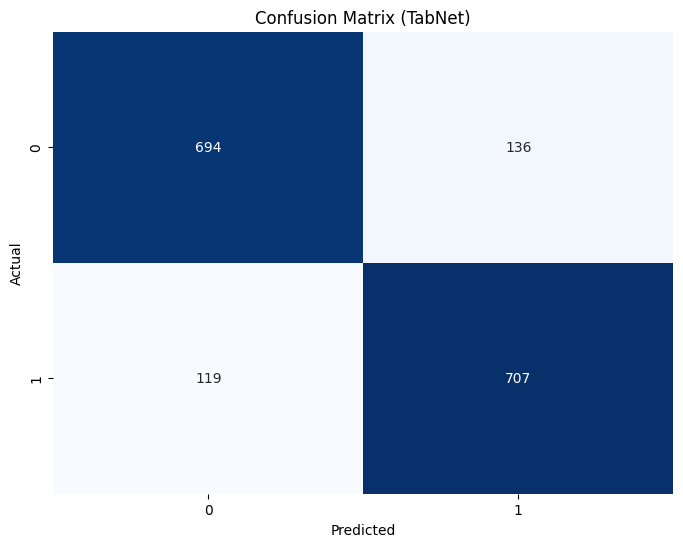

In [142]:
cm1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TabNet)')
plt.show()

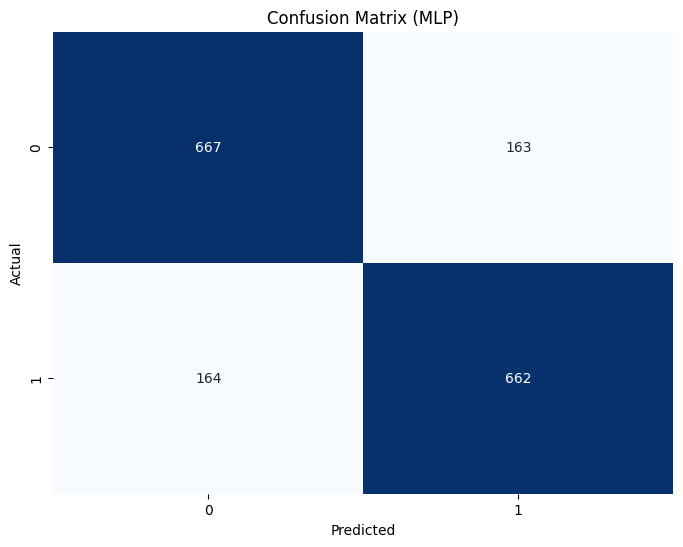

In [143]:
cm2 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()

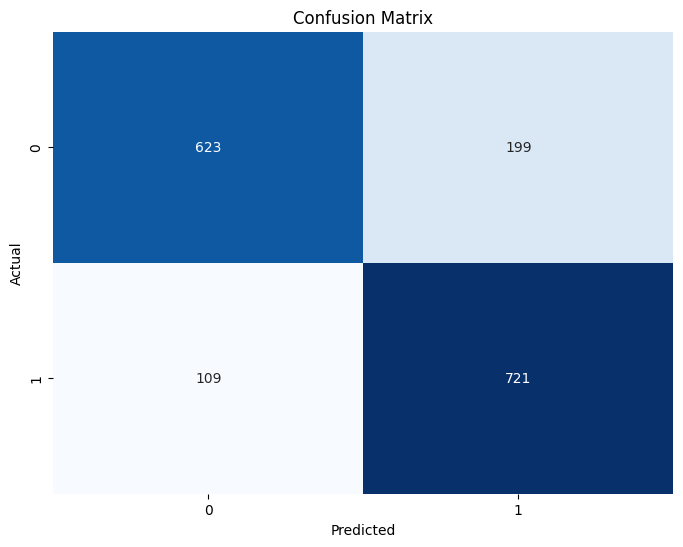

In [80]:
cm3 = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**ROC**

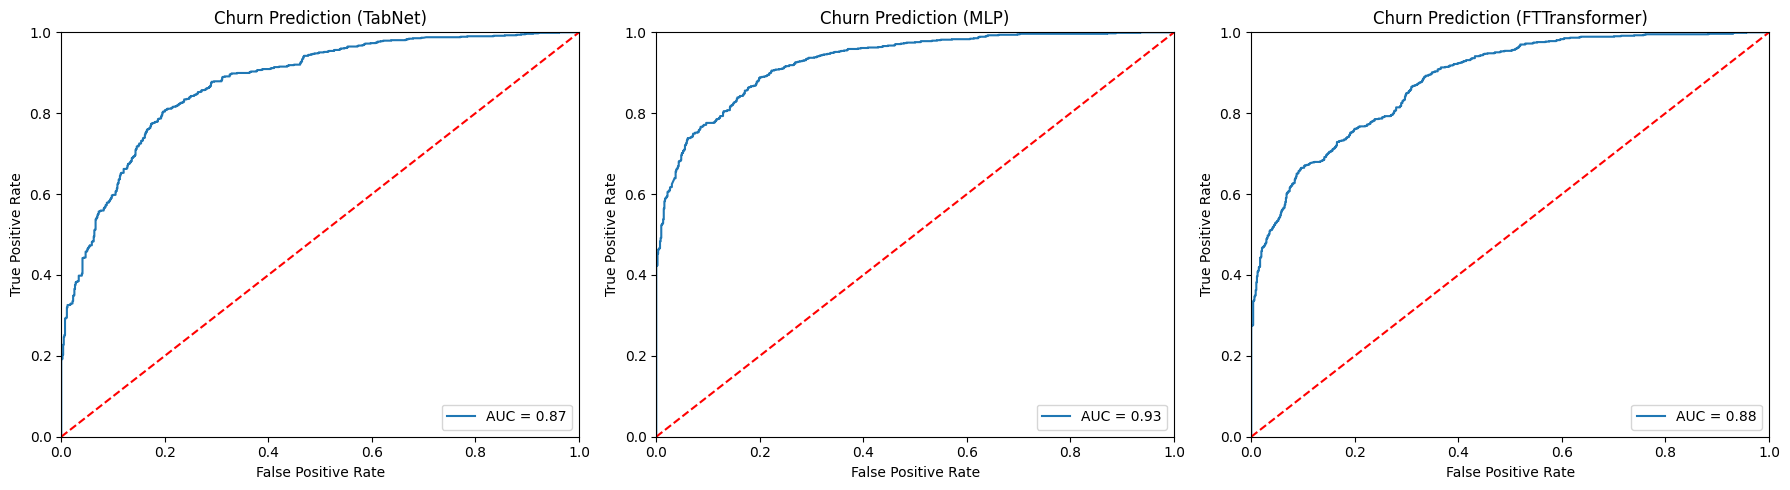

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test, y_proba)          # TabNet
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, preds2)        # MLP
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_true, y_prob)       # FTTransformer
roc_auc3 = auc(fpr3, tpr3)

# Tạo figure với 3 subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

# ROC - TabNet
axs[0].plot(fpr1, tpr1, label='AUC = %0.2f' % roc_auc1)
axs[0].plot([0, 1], [0, 1], 'r--')
axs[0].set_title('Churn Prediction (TabNet)')
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc='lower right')

# ROC - MLP
axs[1].plot(fpr2, tpr2, label='AUC = %0.2f' % roc_auc2)
axs[1].plot([0, 1], [0, 1], 'r--')
axs[1].set_title('Churn Prediction (MLP)')
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 1])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# ROC - FTTransformer
axs[2].plot(fpr3, tpr3, label='AUC = %0.2f' % roc_auc3)
axs[2].plot([0, 1], [0, 1], 'r--')
axs[2].set_title('Churn Prediction (FTTransformer)')
axs[2].set_xlim([0, 1])
axs[2].set_ylim([0, 1])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc='lower right')

plt.tight_layout()
plt.show()
